In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_style("ticks")

%config InlineBackend.figure_format = 'retina'

In [2]:
p_high = 0.0266
p_med = 0.0531
p_low = 0.0797
pal = ['#b2e1a8', '#b3cde3', '#fbb4ae']
pal2 = ['#abdea0', '#8fb6d6', '#f9867b']

In [3]:
def df_gen_unlim_fail_set_seed(a, skill_start, p_high, p_med, p_low):
    l = []
    l.append(a)
    tot_fail = 0
    skill = ''
    random.seed(333)
    
    for i in range(39):
        idx = 0
        r = random.uniform(0, 1)
        while idx in range(3):
            if idx == 0:
                x = (l[i][0] * (1 - p_high) /
                     (1 -
                      (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)) *
                     (1 - l[i][3]) + l[i][0] * p_high /
                     (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low) *
                     l[i][3])
                idx += 1
            elif idx == 1:
                y = (l[i][1] * (1 - p_med) /
                     (1 -
                      (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)) *
                     (1 - l[i][3]) + l[i][1] * p_med /
                     (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low) *
                     l[i][3])
                idx += 1
            elif idx == 2:
                z = (l[i][2] * (1 - p_low) /
                     (1 -
                      (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)) *
                     (1 - l[i][3]) + l[i][2] * p_low /
                     (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low) *
                     l[i][3])
                idx += 1

        if x > max(y, z):
            skill = 'H'
        elif y > max(x, z):
            skill = 'M'
        elif z > max(x, y):
            skill = 'L'

        if skill_start == 'H':
            if i == 38:
                if r < p_high:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_high:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])

        if skill_start == 'M':
            if i == 38:
                if r < p_med:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_med:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])

        if skill_start == 'L':
            if i == 38:
                if r < p_low:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_low:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])
    return l

def df_gen_lim_fail_set_seed(a, skill_start, p_high, p_med, p_low):
    l = []
    l.append(a)
    tot_fail = 0
    skill = ''
    random.seed(333)

    for i in range(39):
        idx = 0
        r = random.uniform(0, 1)

        if tot_fail < 2:
            while idx in range(3):
                if idx == 0:
                    x = (l[i][0] * (1 - p_high) /
                         (1 - (l[i][0] * p_high + l[i][1] * p_med +
                               l[i][2] * p_low)) * (1 - l[i][3]) +
                         l[i][0] * p_high /
                         (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)
                         * l[i][3])
                    idx += 1
                elif idx == 1:
                    y = (l[i][1] * (1 - p_med) /
                         (1 - (l[i][0] * p_high + l[i][1] * p_med +
                               l[i][2] * p_low)) * (1 - l[i][3]) +
                         l[i][1] * p_med /
                         (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)
                         * l[i][3])
                    idx += 1
                elif idx == 2:
                    z = (l[i][2] * (1 - p_low) /
                         (1 - (l[i][0] * p_high + l[i][1] * p_med +
                               l[i][2] * p_low)) * (1 - l[i][3]) +
                         l[i][2] * p_low /
                         (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)
                         * l[i][3])
                    idx += 1

        if x > max(y, z):
            skill = 'H'
        elif y > max(x, z):
            skill = 'M'
        elif z > max(x, y):
            skill = 'L'

        if skill_start == 'H':
            if i == 38:
                if r < p_high:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_high:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])

        if skill_start == 'M':
            if i == 38:
                if r < p_med:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_med:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])

        if skill_start == 'L':
            if i == 38:
                if r < p_low:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_low:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])
    return l

In [4]:
cols = [
    'p_high', 'p_med', 'p_low', 'failure', 'rand_num', 'row_sum',
    'total_failures', 'perceived_skill'
]
ind = range(1, 41)

In [5]:
df_h_unlim_set_seed = pd.DataFrame(df_gen_unlim_fail_set_seed(
    [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'H', p_high, p_med, p_low),
                                   columns=cols,
                                   index=ind)
df_h_lim_set_seed = pd.DataFrame(df_gen_lim_fail_set_seed(
    [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'H', p_high, p_med, p_low),
                                 columns=cols,
                                 index=ind)
df_m_unlim_set_seed = pd.DataFrame(df_gen_unlim_fail_set_seed(
    [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'M', p_high, p_med, p_low),
                                   columns=cols,
                                   index=ind)
df_m_lim_set_seed = pd.DataFrame(df_gen_lim_fail_set_seed(
    [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'M', p_high, p_med, p_low),
                                 columns=cols,
                                 index=ind)
df_l_unlim_set_seed = pd.DataFrame(df_gen_unlim_fail_set_seed(
    [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'L', p_high, p_med, p_low),
                                   columns=cols,
                                   index=ind)
df_l_lim_set_seed = pd.DataFrame(df_gen_lim_fail_set_seed(
    [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'L', p_high, p_med, p_low),
                                 columns=cols,
                                 index=ind)

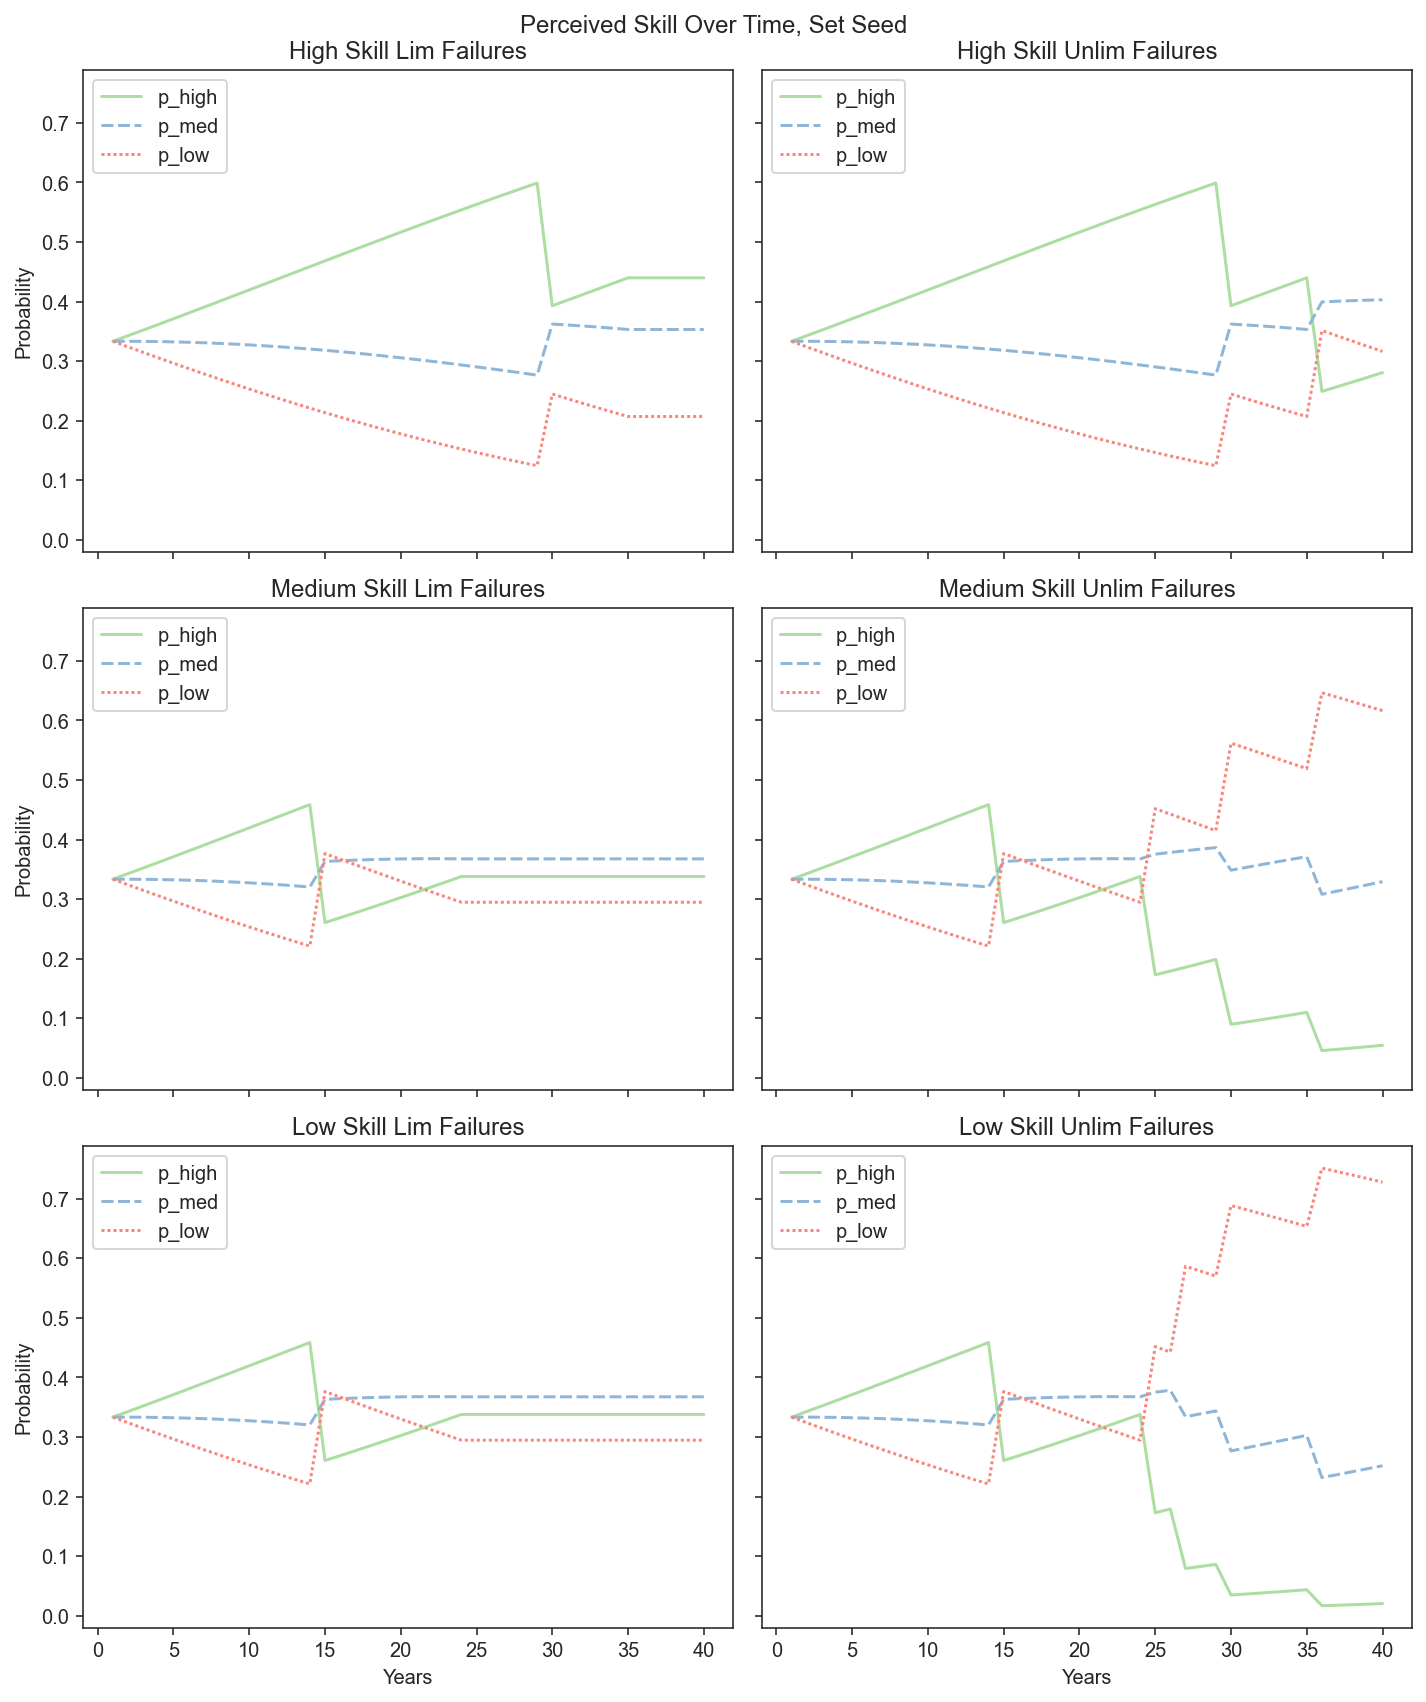

In [6]:
f, axes = plt.subplots(3, 2, figsize=(10, 12), sharey=True)
sns.lineplot(data=(df_h_lim_set_seed['p_high'], df_h_lim_set_seed['p_med'],
                   df_h_lim_set_seed['p_low']),
             palette=pal2,
             ax=axes[0, 0])
sns.lineplot(data=(df_h_unlim_set_seed['p_high'], df_h_unlim_set_seed['p_med'],
                   df_h_unlim_set_seed['p_low']),
             palette=pal2,
             ax=axes[0, 1])
sns.lineplot(data=(df_m_lim_set_seed['p_high'], df_m_lim_set_seed['p_med'],
                   df_m_lim_set_seed['p_low']),
             palette=pal2,
             ax=axes[1, 0])
sns.lineplot(data=(df_m_unlim_set_seed['p_high'], df_m_unlim_set_seed['p_med'],
                   df_m_unlim_set_seed['p_low']),
             palette=pal2,
             ax=axes[1, 1])
sns.lineplot(data=(df_l_lim_set_seed['p_high'], df_l_lim_set_seed['p_med'],
                   df_l_lim_set_seed['p_low']),
             palette=pal2,
             ax=axes[2, 0])
sns.lineplot(data=(df_l_unlim_set_seed['p_high'], df_l_unlim_set_seed['p_med'],
                   df_l_unlim_set_seed['p_low']),
             palette=pal2,
             ax=axes[2, 1])

for ax in axes.flat:
    ax.legend(loc='upper left')
    ax.set_xlabel('Years')
    ax.set_ylabel('Probability')
    ax.label_outer()

axes[0, 0].set_title("High Skill Lim Failures")
axes[0, 1].set_title("High Skill Unlim Failures")
axes[1, 0].set_title("Medium Skill Lim Failures")
axes[1, 1].set_title("Medium Skill Unlim Failures")
axes[2, 0].set_title("Low Skill Lim Failures")
axes[2, 1].set_title("Low Skill Unlim Failures")
f.suptitle('Perceived Skill Over Time, Set Seed')
plt.tight_layout()
plt.savefig('Perceived_Skill_Set_Seed_2', dpi=300)